<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

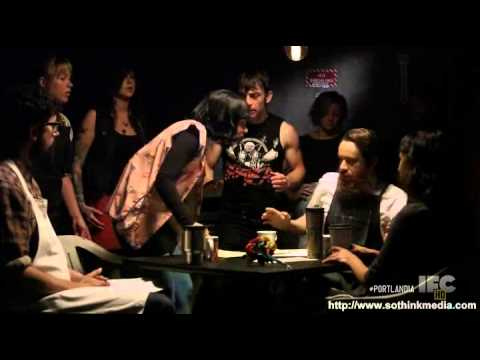

In [118]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [119]:
%pwd

'C:\\Users\\johnt\\unit3\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [120]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
# analyze the shape
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [121]:
# Notice anything odd here? - lots of different shops  
shops['coffee_shop_name'].value_counts(normalize=True)[:50]

Epoch Coffee                       0.052521
Halcyon                            0.039391
The Factory - Cafe With a Soul     0.032038
Houndstooth Coffee                 0.026261
Venezia Italian Gelato             0.026261
Caffé Medici                       0.018776
Apanas Coffee & Beer               0.017857
Summer Moon Coffee Bar             0.013130
Café Java                          0.013130
Once Over Coffee Bar               0.013130
Bennu Coffee                       0.013130
The Steeping Room                  0.013130
Cenote                             0.013130
Dolce Neve                         0.013130
Hot Mama’s Cafe                    0.013130
Irie Bean Coffee Bar               0.013130
Alta’s Cafe                        0.013130
Arturo’s Underground Cafe          0.013130
Russell’s Bakery                   0.013130
The Buzz Mill                      0.013130
Seventh Flag Coffee Co             0.013130
Sa-Ten                             0.013130
Figure 8 Coffee Purveyors       

In [122]:
# Much cleaner - made lower case from notes
shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['coffee_shop_name'].value_counts(normalize=True)[:50]

epoch coffee                       0.052521
halcyon                            0.039391
the factory - cafe with a soul     0.032038
houndstooth coffee                 0.026261
venezia italian gelato             0.026261
caffé medici                       0.018776
apanas coffee & beer               0.017857
lola savannah coffee lounge        0.013130
picnik austin                      0.013130
cenote                             0.013130
sorrento’s coffee                  0.013130
caffe medici                       0.013130
once over coffee bar               0.013130
café crème                         0.013130
dominican joe                      0.013130
live oak market                    0.013130
figure 8 coffee purveyors          0.013130
tea haus                           0.013130
arturo’s underground cafe          0.013130
monkey nest coffee                 0.013130
hot mama’s cafe                    0.013130
stinson’s                          0.013130
toms                            

In [123]:
# whats the types
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   full_review_text  7616 non-null   object
 2   star_rating       7616 non-null   object
dtypes: object(3)
memory usage: 178.6+ KB


In [124]:
# How can we count the raw text? - all reviews are unique
shops['full_review_text'].value_counts(normalize=True)[:5]

 10/29/2016 First time checking this place out first time. Pretty swag. Nice assortment of drinks. I got the 15 minutes of fame. Also got the poptart. Delicious!  Next time I'll try the Marymount Monroe. Will definitely come back soon.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      0.000525
 11/9/2016 Really cute and hea

In [125]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens']

0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object

In [126]:
#see the difference
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


In [127]:
## Object from Base Python - ten most common words one is coffee so thats good
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [128]:
shops['tokens'].count

<bound method Series.count of 0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object>

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [129]:
#Overall Word / Token Count
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [130]:
# Use the Function
wc = count(shops['tokens'])

In [131]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,the,6847,34809,1.0,0.044537,0.044537,0.899028
56,and,6864,26650,2.0,0.034098,0.078635,0.901261
12,a,6246,22755,3.0,0.029114,0.107749,0.820116
73,i,5528,20237,4.0,0.025893,0.133642,0.725840
17,to,5653,17164,5.0,0.021961,0.155602,0.742253


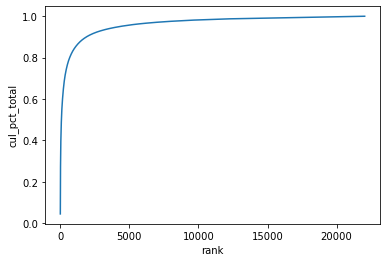

In [132]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [133]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5335194530026511

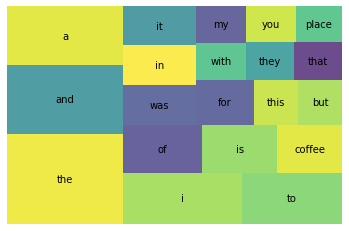

In [134]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [135]:
#View Counts by Rating
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [136]:
# check formating od text in star rating for determination
shops['star_rating'][2]

' 4.0 star rating '

In [137]:
#Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.
shops['determination'] = ["good" if star_rating == ' 5.0 star rating ' else "good" if star_rating == ' 4.0 star rating ' else "bad" for star_rating in shops['star_rating']]
shops['determination'].value_counts(normalize=True)

good    0.806197
bad     0.193803
Name: determination, dtype: float64

In [138]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,determination
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,...",good
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb...",good
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo...",good
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni...",bad
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with...",good


In [ ]:
#commit

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [46]:
# Rel. freq. instead of absolute counts b/c of different numbers of reviews


In [139]:
# Only look at the top 5-10 words with the greatest differences - get rid of stop words
import spacy

nlpl = spacy.load("en_core_web_lg")

In [140]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [141]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

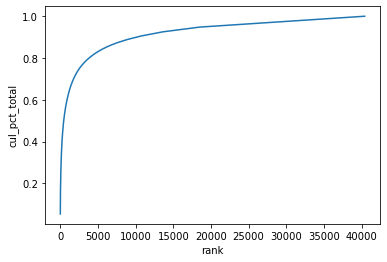

In [143]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [144]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.2954798148020834

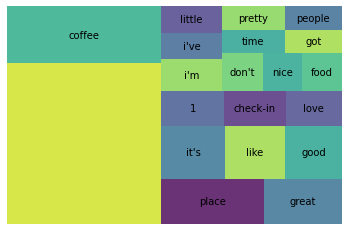

In [142]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



### - Add classification problem that predict rating of coffee shop